# The YAML based design flow


In [1]:
import gdsfactory as gf
from gdsfactory.gpdk import PDK
PDK.activate()

In [ ]:
gf.CONF.plot_height = 750
gf.CONF.plot_width = 350
gf.CONF.plot_oversampling = 5.0

In [ ]:
yaml_string = (
"""
name: mask_compact

instances:
  rings:
    # `pack_doe` is a special function that creates a Design of Experiments array.
    component: pack_doe
    settings:
      
      # It will create ring resonators with these different radii and coupling lengths.
      doe: ring_single
      max_size : [1500, null]
      settings:
        radius: [20, 30, 40, 50, 60]
        length_x: [1, 2, 3, 4, 5, 6]

      # This tells the function to generate all possible combinations of the specified radius and length_x values.
      do_permutations: True
      function:

        # After each unique ring is created, the add_fiber_array function is applied to it, adding grating couplers for testing.
        function: add_fiber_array
        settings:
            fanout_length: 200

  mzis:
    component: pack_doe_grid
    settings:
      doe: mzi
      settings:
        delta_length: [10, 100]
      do_permutations: True
      spacing: [10, 10]
      function: add_fiber_array

placements:
  rings:
    xmin: 50

  mzis:
    xmin: rings,east
"""
)

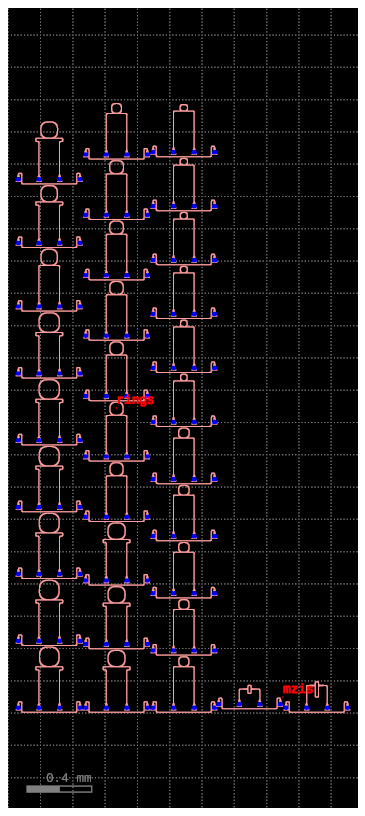

In [4]:
#| label: yaml-flow
c = gf.read.from_yaml(yaml_string)
c